<a href="https://colab.research.google.com/github/Iryna-Lytvynchuk/Product-Analytics-Camp/blob/main/Test_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/data/marketing_data.csv"
df = pd.read_csv(path)
df.head()
print(df)

         ID  Year_Birth   Education  ... Response Complain  Country
0      1826        1970  Graduation  ...        1        0       SP
1         1        1961  Graduation  ...        1        0       CA
2     10476        1958  Graduation  ...        0        0       US
3      1386        1967  Graduation  ...        0        0      AUS
4      5371        1989  Graduation  ...        1        0       SP
...     ...         ...         ...  ...      ...      ...      ...
2235  10142        1976         PhD  ...        0        0       US
2236   5263        1977    2n Cycle  ...        0        0       SP
2237     22        1976  Graduation  ...        0        0       SP
2238    528        1978  Graduation  ...        0        0      IND
2239   4070        1969         PhD  ...        1        0       CA

[2240 rows x 28 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
df.rename(columns={' Income ':'Income'}, inplace = True)

In [ ]:
df['Income'] = df['Income'].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df['Income'] = df['Income'].str.replace(',','')

In [ ]:
df['Income'] = df['Income'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df[df.ID.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age


In [ ]:
df.groupby('Education').agg({'ID': 'count'}).sort_values('ID', ascending=False)

,ID
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


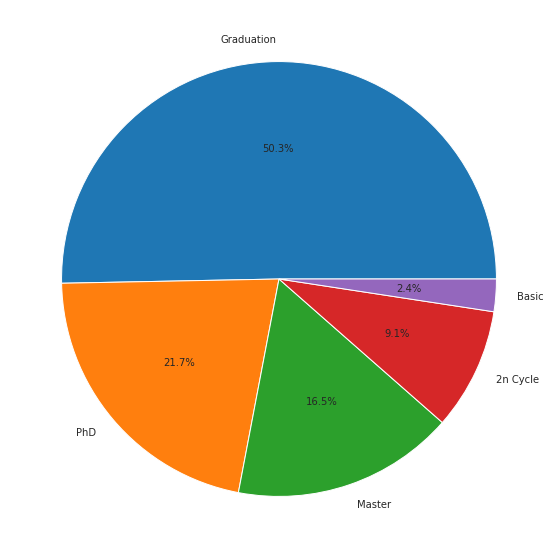

In [ ]:
ed = df['Education'].value_counts().to_frame('Count')

plt.figure(figsize = (10, 10))
plt.pie(ed['Count'], labels = ed.index, autopct = '%1.1f%%')
plt.show()

In [ ]:
df.groupby('Marital_Status').agg({'ID': 'count'}).sort_values('ID', ascending=False)

,ID
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


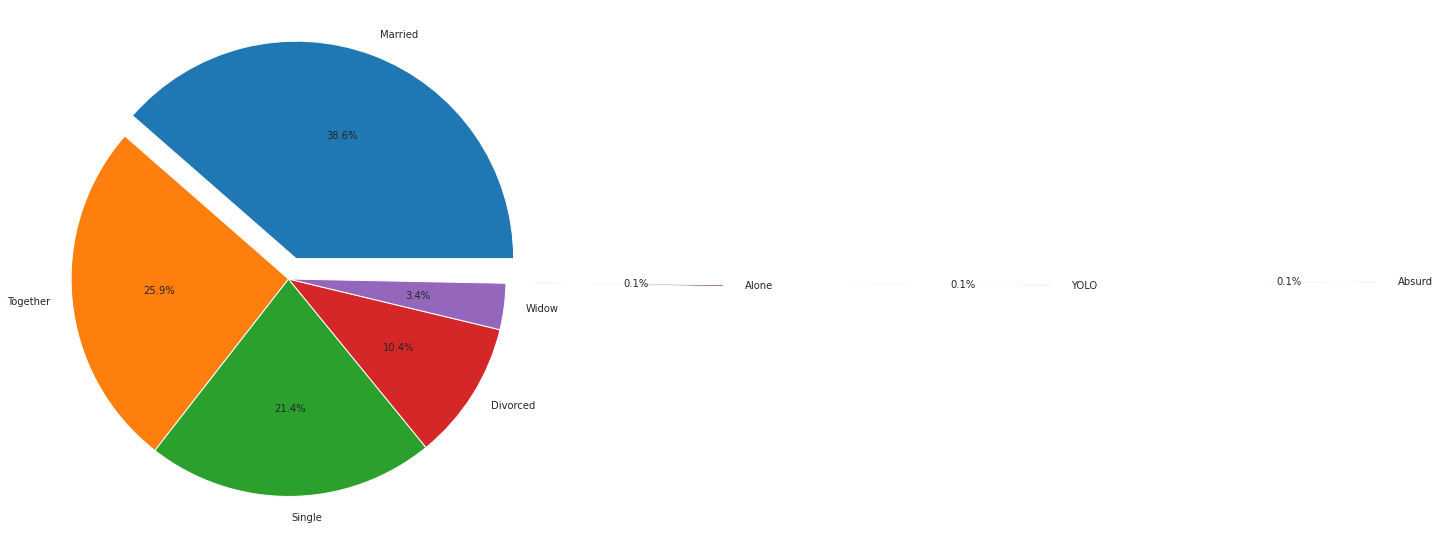

In [ ]:
m_s = df['Marital_Status'].value_counts().to_frame('Count')

plt.figure(figsize = (10, 10))
plt.pie(m_s['Count'], labels = m_s.index, explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), autopct = '%1.1f%%')
plt.show()

In [ ]:
df.groupby('Kidhome').agg({'ID': 'count'}).sort_values('ID', ascending=False)

,ID
Kidhome,
0,1293
1,899
2,48


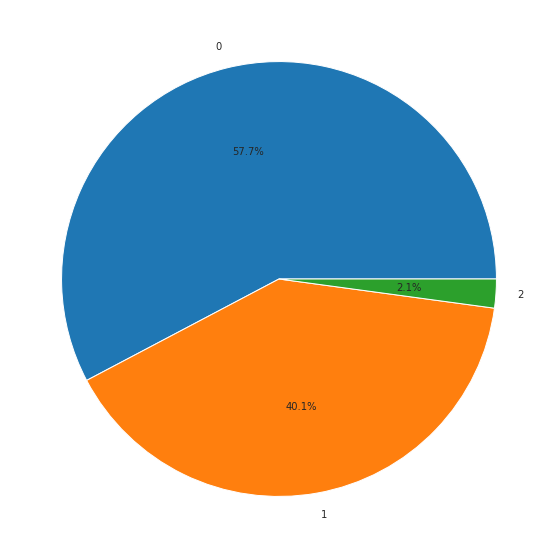

In [ ]:
kid = df['Kidhome'].value_counts().to_frame('Count')

plt.figure(figsize = (10, 10))
plt.pie(kid['Count'], labels = kid.index, autopct = '%1.1f%%')
plt.show()

In [ ]:
df.groupby('Teenhome').agg({'ID': 'count'}).sort_values('ID', ascending=False)

,ID
Teenhome,
0,1158
1,1030
2,52


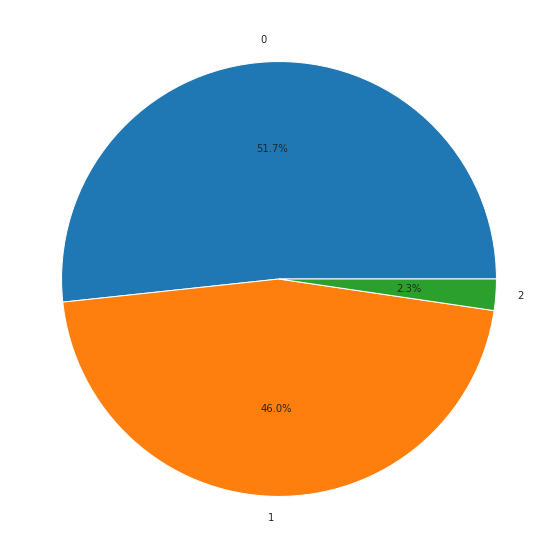

In [ ]:
tee = df['Teenhome'].value_counts().to_frame('Count')

plt.figure(figsize = (10, 10))
plt.pie(tee['Count'], labels = tee.index, autopct = '%1.1f%%')
plt.show()

In [ ]:
df.groupby('Country').agg({'ID': 'count'}).sort_values('ID', ascending=False)

,ID
Country,
SP,1095
SA,337
CA,268
AUS,160
IND,148
GER,120
US,109
ME,3


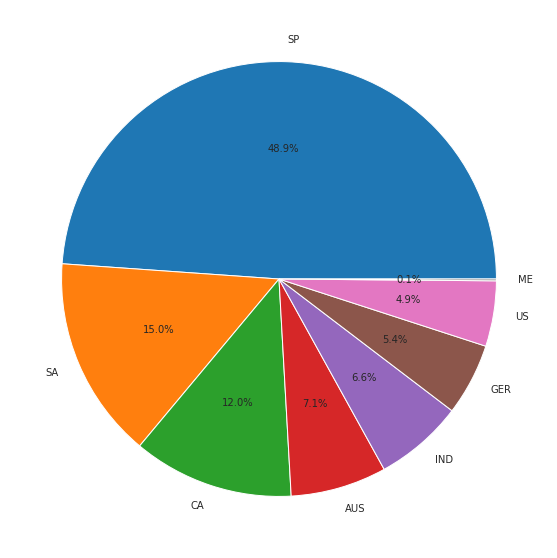

In [ ]:
country = df['Country'].value_counts().to_frame('Count')

plt.figure(figsize = (10, 10))
plt.pie(country['Count'], labels = country.index, autopct = '%1.1f%%')
plt.show()

In [ ]:
# Our client : has graduation, maried, has no kids or teens or has one child, lives in Spain, 52 years old, has 52 000$ salary

In [ ]:
df.groupby('Country').agg({'ID': pd.Series.nunique}).sort_values('ID', ascending=False)

,ID
Country,
SP,1095
SA,337
CA,268
AUS,160
IND,148
GER,120
US,109
ME,3


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you

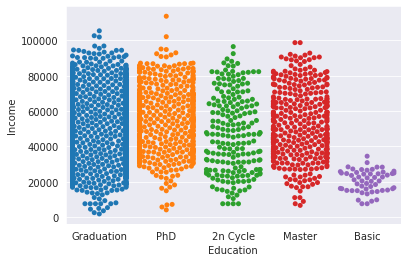

In [ ]:
df_in=df[df['Income']<120000]
sns.swarmplot(x='Education', y='Income', data=df_in)

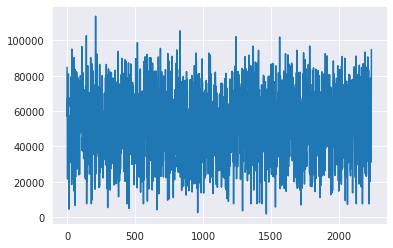

In [ ]:
df_in.Income.plot()

In [ ]:
df_in.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,TotalMnt,TotalPurchases,TotalCampaignsAcc
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,5586.900815,1968.807065,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,2.316576,4.098279,2.644928,5.819293,5.334239,0.073822,0.074275,0.073370,0.064312,0.013587,0.150815,0.009511,53.192935,1213.751812,29.879076,0.450181
std,3249.110303,11.991913,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,1.885450,2.736724,2.798441,3.241866,2.413837,0.261541,0.262278,0.260801,0.245363,0.115795,0.357950,0.097081,11.991913,1204.180543,7.615973,0.893647
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,10.000000,15.000000,0.000000
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,138.000000,23.000000,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,794.000000,30.000000,0.000000
75%,8418.500000,1977.000000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,2094.500000,36.000000,1.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,5050.000000,58.000000,5.000000


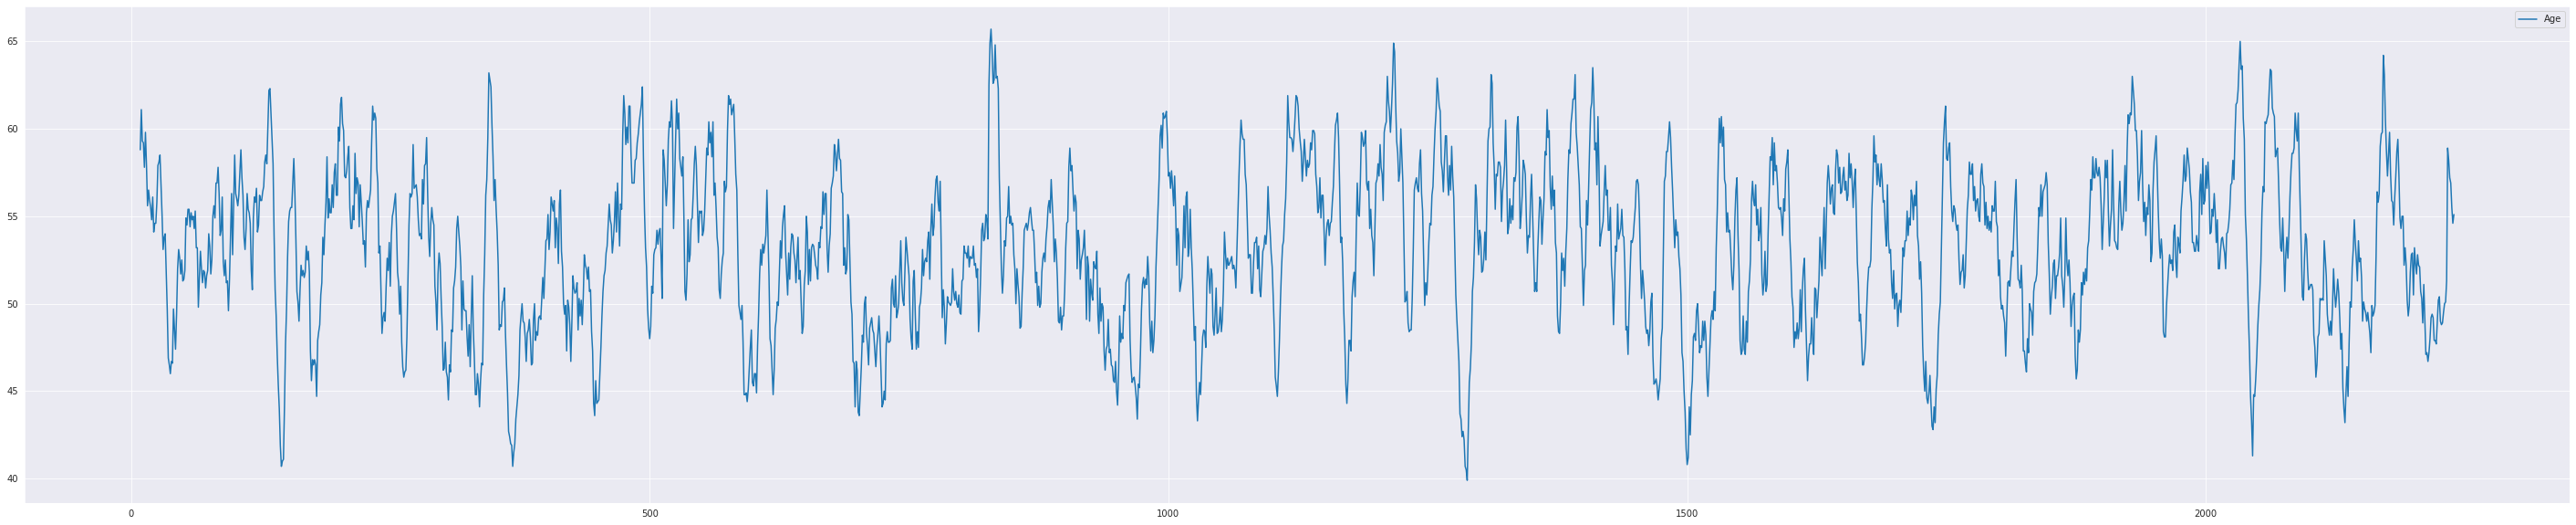

In [ ]:
df['Age']=2022-df['Year_Birth']
df[['Age']].rolling(10).mean().plot(figsize=(50,10))

In [ ]:
age = df[df['Age']<80]

print(age['Age'].mean())
print(age['Age'].median())

53.07293064876958
52.0


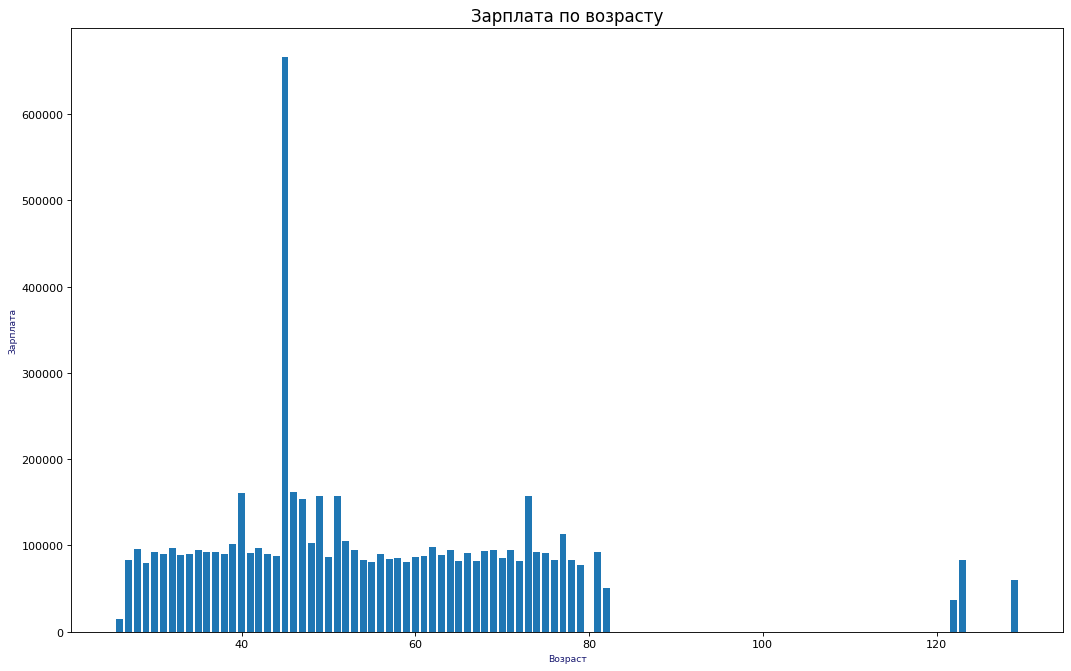

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(
    df.Age,
    df.Income,
)
plt.xlabel('Возраст', fontsize='small', color='midnightblue')
plt.ylabel('Зарплата', fontsize='small', color='midnightblue')
plt.title('Зарплата по возрасту', fontsize=15)
plt.show()

MntWines    680816
dtype: int64


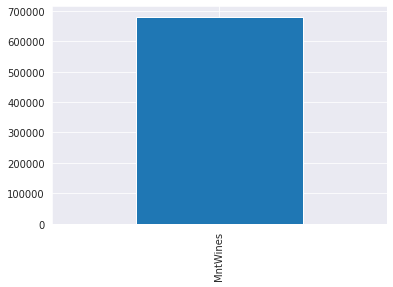

In [ ]:
drink = df[['MntWines']]
print(drink.sum())
drink.sum().plot.bar()
plt.show()

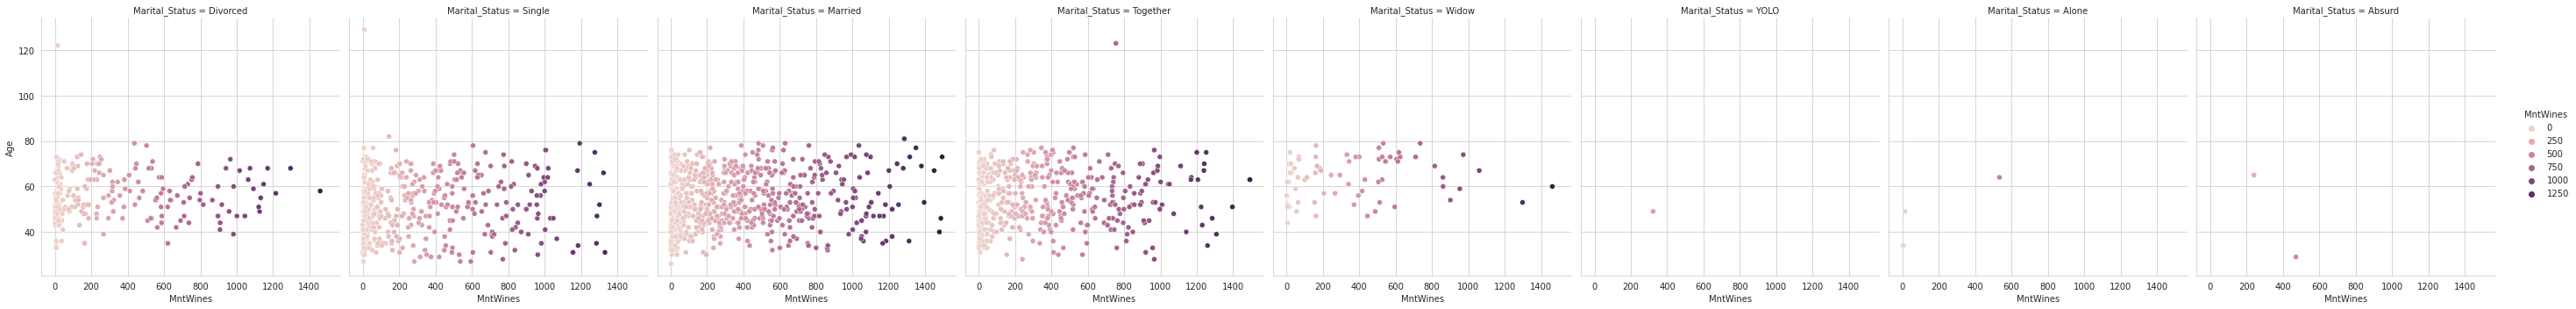

In [ ]:
df_wine= df[['Marital_Status', 'Age', 'MntWines']]
sns.relplot(x='MntWines', y='Age', kind='scatter', hue='MntWines', col='Marital_Status', data=df_wine)

MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
dtype: int64


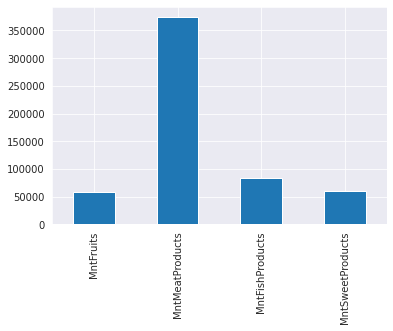

In [ ]:
products = df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
print(products.sum())
products.sum().plot.bar()
plt.show()

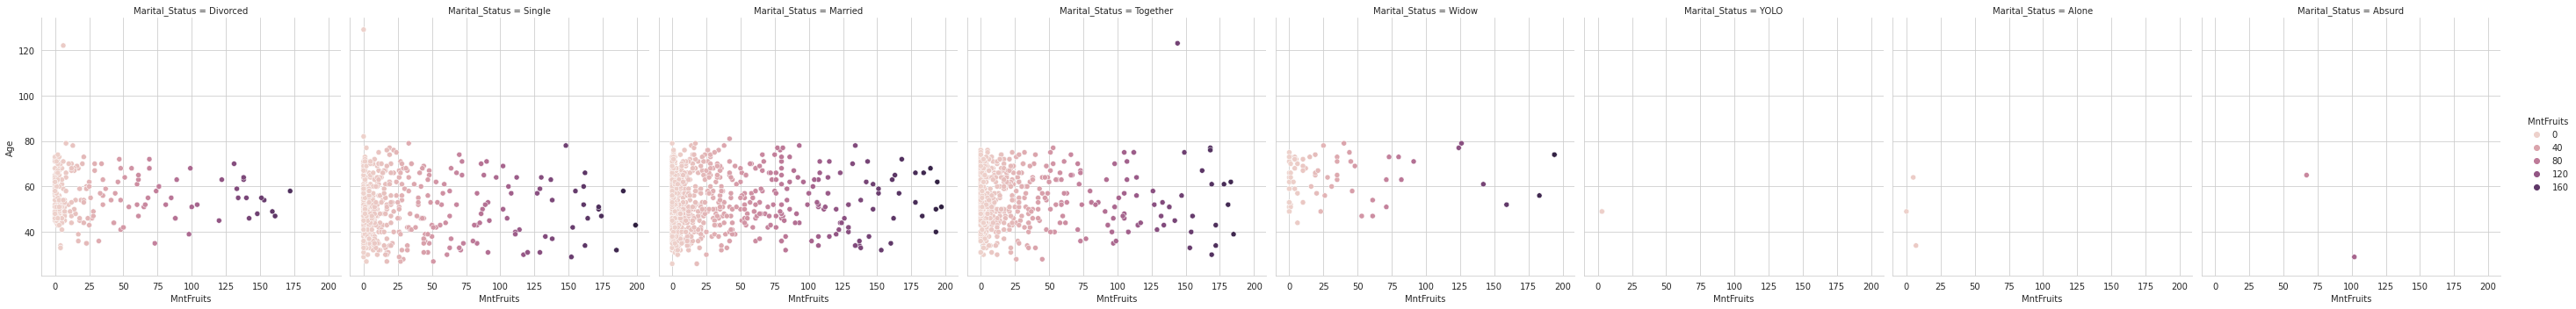

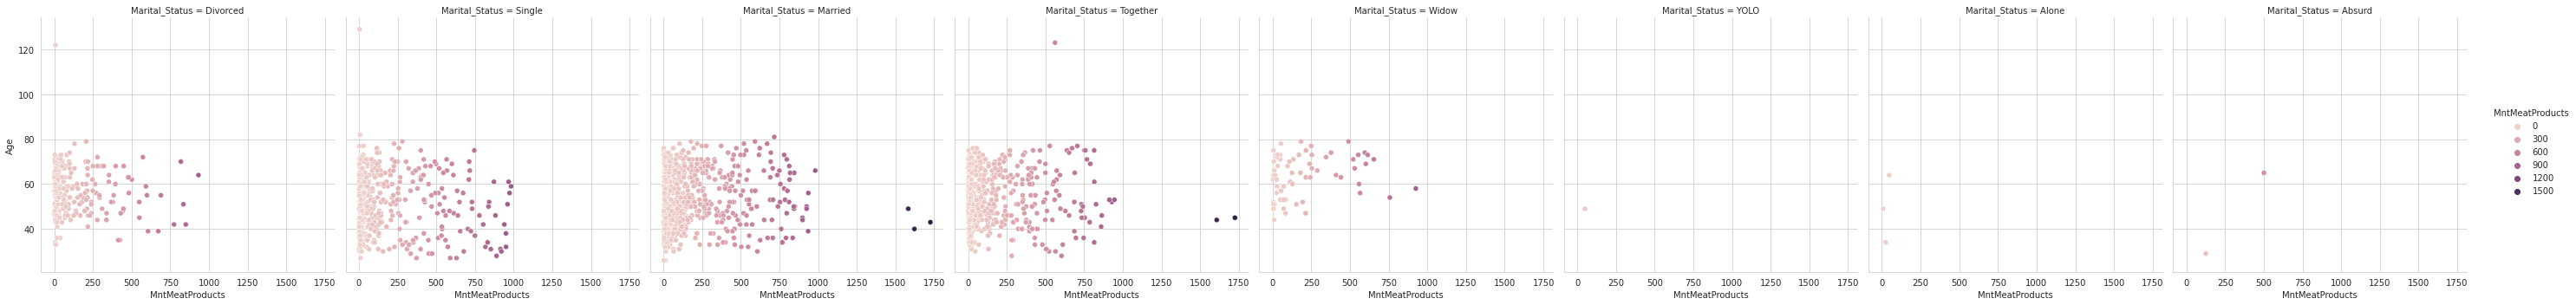

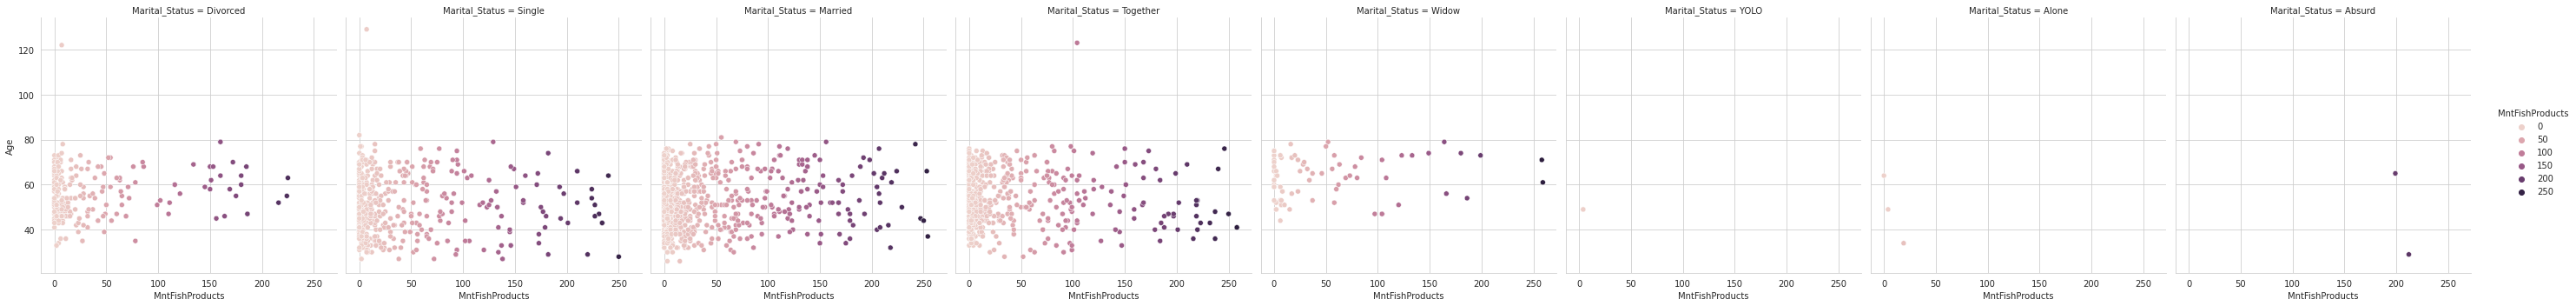

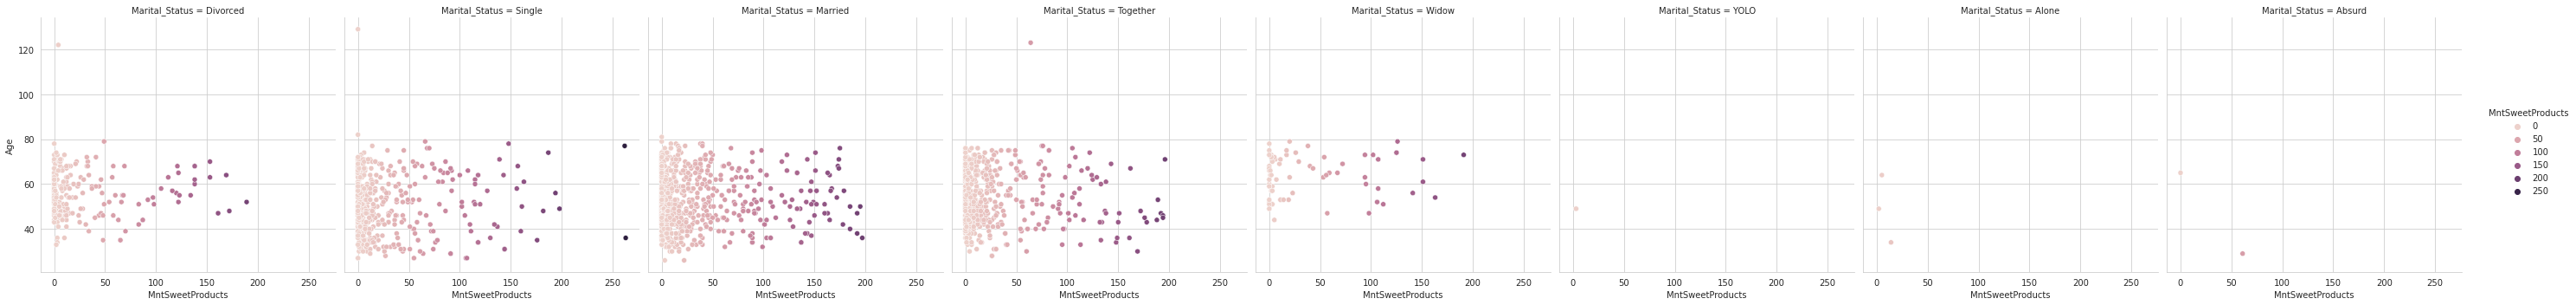

In [ ]:
df_prod= df[['Marital_Status', 'Age', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
sns.relplot(x='MntFruits', y='Age', kind='scatter', hue='MntFruits', col='Marital_Status', data=df_prod)
sns.relplot(x='MntMeatProducts', y='Age', kind='scatter', hue='MntMeatProducts', col='Marital_Status', data=df_prod)
sns.relplot(x='MntFishProducts', y='Age', kind='scatter', hue='MntFishProducts', col='Marital_Status', data=df_prod)
sns.relplot(x='MntSweetProducts', y='Age', kind='scatter', hue='MntSweetProducts', col='Marital_Status', data=df_prod)

MntGoldProds    98609
dtype: int64


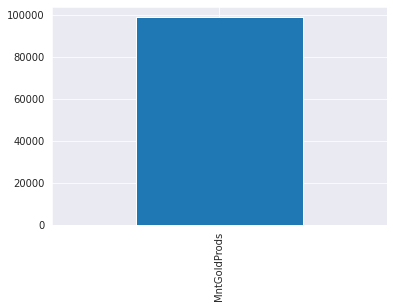

In [ ]:
gold = df[['MntGoldProds']]
print(gold.sum())
gold.sum().plot.bar()
plt.show()

In [ ]:
# buy wine, meat, gold

In [ ]:
# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis=1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis=1)


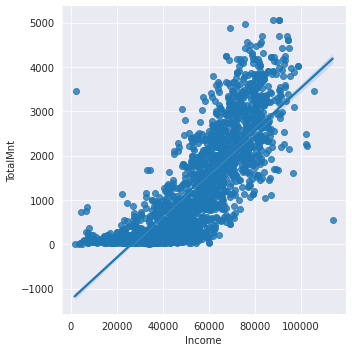

In [ ]:
sns.lmplot(x='Income', y='TotalMnt', data=df[df['Income'] < 120000])

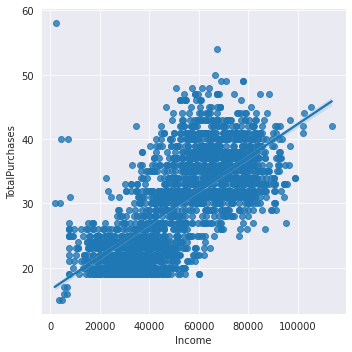

In [ ]:
sns.lmplot(x='Income', y='TotalPurchases', data=df[df['Income'] < 120000])

In [ ]:
cmp_all = df[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
Response        334
dtype: int64


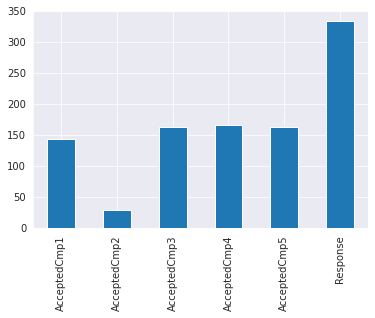

In [ ]:
print(cmp_all.sum())
cmp_all.sum().plot.bar()
plt.show()

In [ ]:
# Total Campaigns Acc
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] 
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

In [ ]:
metod = df[['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

NumDealsPurchases       5208
NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64


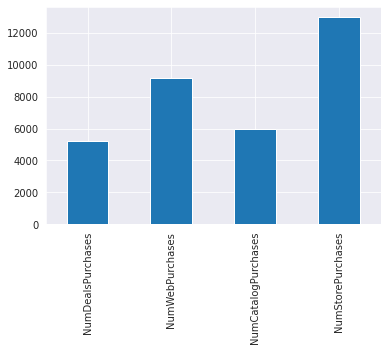

In [ ]:
print(metod.sum())
metod.sum().plot.bar()
plt.show()

In [ ]:
visits = df['NumWebVisitsMonth'].sum()
print(visits)

11909


In [ ]:
products_last= df[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Response']]
products_last = products_last[products_last['Response']>0]
products_last = products_last.drop(['Response'], axis=1)
print(products_last)

      MntWines  MntFruits  ...  MntSweetProducts  MntGoldProds
0          189        104  ...               189           218
1          464          5  ...                 0            37
4            6         16  ...                 0            34
5          336        130  ...                32            43
6          769         80  ...                34            65
...        ...        ...  ...               ...           ...
2195      1004         59  ...                59            27
2196      1004         59  ...                59            27
2212       982         17  ...                34            51
2216       459          0  ...                 0             4
2239       169         24  ...                 0           144

[334 rows x 6 columns]


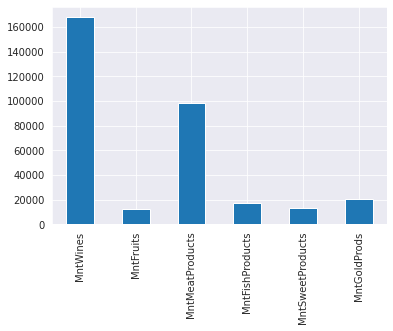

In [ ]:
products_last.sum().plot.bar()
plt.show()

In [ ]:
products_last.median()

MntWines            448.0
MntFruits            21.0
MntMeatProducts     174.5
MntFishProducts      25.0
MntSweetProducts     20.0
MntGoldProds         39.5
dtype: float64

In [ ]:
products_last.query('MntWines >=448 & MntFruits >= 21 & MntMeatProducts >= 174 & MntFishProducts >= 25 & MntSweetProducts >= 20')

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
35,1285,21,449,106,20,20
70,1074,37,518,193,92,129
77,1285,105,653,28,21,0
137,784,48,560,42,176,48
173,530,117,678,134,44,147
...,...,...,...,...,...,...
2110,1017,50,500,65,50,133
2178,899,102,838,133,102,40
2179,899,102,838,133,102,40
2195,1004,59,265,115,59,27


In [ ]:
df.query('MntWines >=504 & MntFruits >= 33 & MntMeatProducts >= 232 & MntFishProducts >= 50 & MntSweetProducts >= 33')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
70,1772,1975,PhD,Married,79174.0,0,0,1/11/13,2,1074,37,518,193,92,129,1,5,6,7,2,0,0,1,1,0,1,0,CA,47
74,7022,1971,Graduation,Married,76445.0,1,0,9/28/12,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,51
108,8278,1990,PhD,Married,74214.0,0,0,8/26/12,3,863,83,547,86,99,33,1,8,2,5,5,0,0,0,0,0,0,0,SP,32
129,10177,1954,Graduation,Divorced,72071.0,0,1,2/14/13,4,531,69,300,150,138,150,3,5,4,8,2,0,0,0,0,0,0,0,SP,68
130,2429,1954,Graduation,Divorced,72071.0,0,1,2/14/13,4,531,69,300,150,138,150,3,5,4,8,2,0,0,0,0,0,0,0,CA,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,5830,1972,PhD,Single,86857.0,0,0,9/12/12,96,899,102,838,133,102,40,1,5,6,10,2,0,0,0,0,0,1,0,SA,50
2185,5046,1958,Graduation,Divorced,78331.0,0,1,1/23/14,97,756,138,354,160,169,61,2,10,6,7,4,0,0,0,0,0,0,0,SA,64
2195,5153,1967,PhD,Married,77766.0,0,1,2/22/13,97,1004,59,265,115,59,27,2,11,10,11,6,1,0,0,0,0,1,0,SP,55
2196,4127,1967,PhD,Married,77766.0,0,1,2/22/13,97,1004,59,265,115,59,27,2,11,10,11,6,1,0,0,0,0,1,0,SP,55


Наш клієнт: 52 роки, має вищу освіту, одружений(на), не має дітей і підлітків або має одну дитину, проживає в Іспанії, має дохід в 52 000 $.
З цих даних ми можемо зробити такий висновок: найбільш популярні продукти це вино і м'ясо. З проведенних кампаній найвдалішою була остання (в 2 рази) і також більшість скуповує ці продукти в магазині. Отже, можливо треба звернути увагу людей на інші товари, провести рекламні акції, знижки, також вдосконалити сайт. З показників останьої кампанії відмічається 76 лояльних клієнтів або з всіх кампаній 133 лояльних клієнтів, для яких можливо зробити карту клієнта, це також спонукатиме інших купляти більше товарів. 

Візуалізація в Tableau
https://public.tableau.com/views/Testtask_16451211407340/Story1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link